# Real Data Experiments - Compositional Analysis

## Import Statements

In [36]:
import os
import sys
sys.path.append(os.path.join(os.getcwd(), "../src"))

import pandas as pd
import numpy as np
import skbio.stats.composition as cmp
import plotly.express as px
import matplotlib.pyplot as plt
import pandas as pd
import statsmodels.api as sm
from jax.config import config
config.update("jax_enable_x64", True)
import dirichlet
from classo import classo_problem

from method_fct import LinearInstrumentModel
from utils_real import *

In [37]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Load in Data

Different aggregation levels:
- Pylum
- Class
- Order
- Family
- Genus
- Species

In [38]:
agg_level = "Order"

input_path = "/Users/elisabeth.ailer/Projects/P1_Microbiom/Code/input/data/orgData_Day21_"+agg_level+"_231228.csv"

## Preprocess the Data

In [83]:
# load real data on different aggregation levels

data = pd.read_csv(input_path, index_col=0)

Y = data.iloc[-1, :].values
X_count = data[data.sum(axis=1)!=0].iloc[:-1, :].T.values

X_count = add_pseudo_count(X_count)
n, p = X_count.shape
num_inst = 1  # number of instruments, here only 1
X = np.array([X_count[i, :]/X_count[i, :].sum() for i in range(n)])
Z = np.array([data.columns.values[i].find("control") for i in range(n)])*(-1)

bac_names = list(data[data.sum(axis=1)!=0].iloc[:-1, :].index)

In [93]:
Y_binary = np.array([1 if i > np.median(Y) else 0 for i in Y])

## Visualization of Data

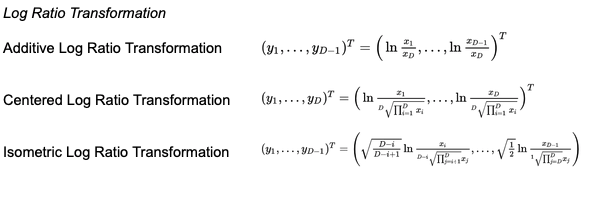

In [94]:
X_ilr = cmp.ilr(X)
X_alr = cmp.alr(X)

In [95]:
# Compute F-Statistics 
pd.DataFrame(np.vstack([bac_names[:-1], compute_fstatistic(Z, X_alr)])).T

,0,1
0,Bacteria*Actinobacteria*Coriobacteriia*Corioba...,0.03
1,Bacteria*Proteobacteria*Gammaproteobacteria*Xa...,0.19
2,Bacteria*Proteobacteria*Gammaproteobacteria*Ps...,0.48
3,Bacteria*Proteobacteria*Gammaproteobacteria*En...,0.63
4,Bacteria*Proteobacteria*Betaproteobacteria*Bur...,0.13
5,Bacteria*Proteobacteria*Alphaproteobacteria*Rh...,0.1
6,Bacteria*Proteobacteria*Alphaproteobacteria*Sp...,0.21
7,Bacteria*Actinobacteria*Actinobacteria*Actinom...,0.1
8,Bacteria*Cyanobacteria*Chloroplast*Streptophyta,0.0
9,Bacteria*Cyanobacteria*4C0d-2*YS2,0.02


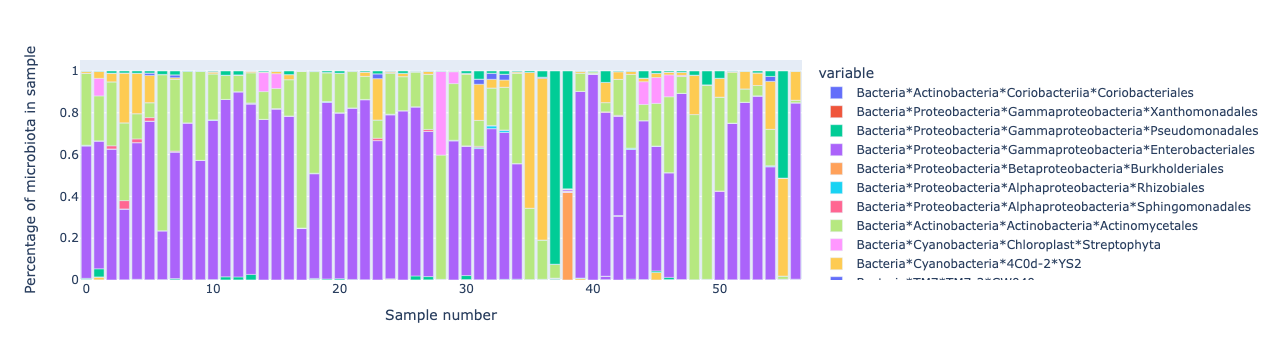

In [96]:
fig = px.bar(pd.DataFrame(X, columns = bac_names))
#fig = update_layout_px(fig)
fig.update_xaxes(title="Sample number")
fig.update_yaxes(title="Percentage of microbiota in sample")
fig.show()

# Fit One Stage and Two Stage Models

The following models are up for evaluation:

__One Stage Method__
- Only Second LC
- Only Second ilr

__Two Stage Methods__
- Dirichlet Regression + Log Contrast
- ilr regression + Log Contrast


In [97]:
V = cmp._gram_schmidt_basis(p)

res = {}
threshold = 0.65
verbose=True

## Continuous Outcome

************************************************************************************************
********************************* ONE STAGE METHOD *****************************************
************************************************************************************************


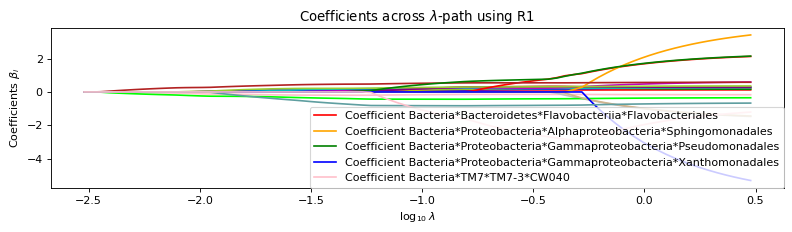

/Users/elisabeth.ailer/anaconda3/envs/comp_iv/lib/python3.9/site-packages/classo/solver.py:1430: UserWarning:

Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.



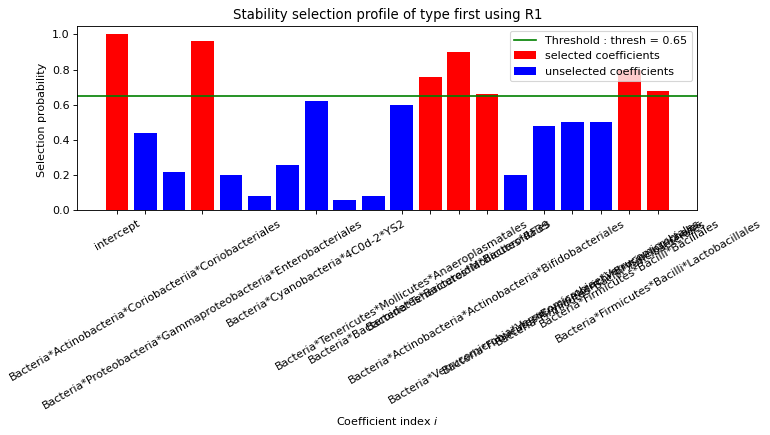

/Users/elisabeth.ailer/anaconda3/envs/comp_iv/lib/python3.9/site-packages/classo/solver.py:1474: UserWarning:

Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.



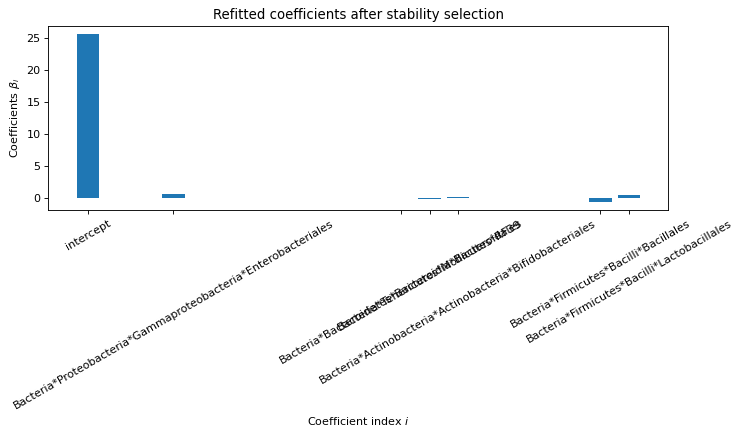


 PATH COMPUTATION : 
   There is also an intercept.  
   Running time :  0.003s

 STABILITY SELECTION : 
   Selected variables :  intercept    Bacteria*Proteobacteria*Gammaproteobacteria*Enterobacteriales    Bacteria*Bacteroidetes*Bacteroidia*Bacteroidales    Bacteria*Tenericutes*Mollicutes*RF39    Bacteria*Actinobacteria*Actinobacteria*Bifidobacteriales    Bacteria*Firmicutes*Bacilli*Bacillales    Bacteria*Firmicutes*Bacilli*Lactobacillales    
   Running time :  0.076s

************************************************************************************************
********************************* TWO STAGE METHOD *****************************************
************************************** ILR + LC ****************************************************


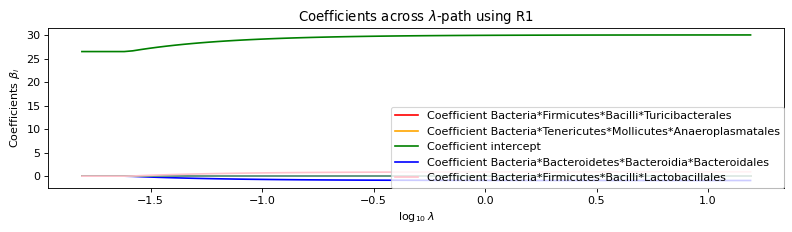

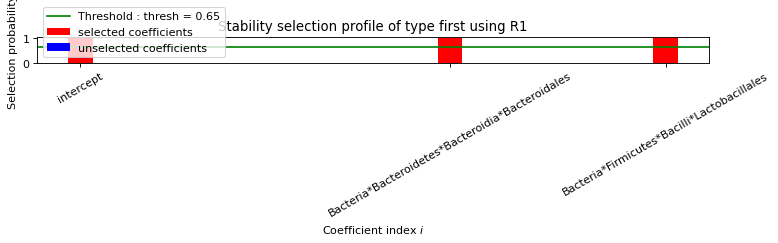

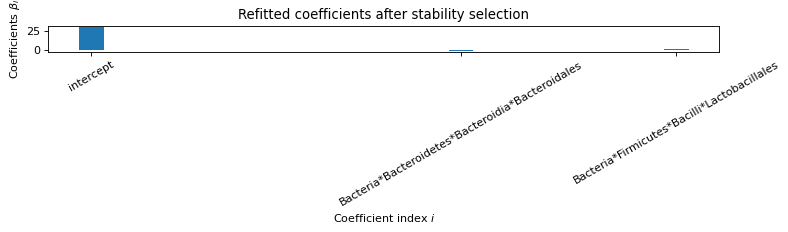


 PATH COMPUTATION : 
   There is also an intercept.  
   Running time :  0.003s

 STABILITY SELECTION : 
   Selected variables :  intercept    Bacteria*Bacteroidetes*Bacteroidia*Bacteroidales    Bacteria*Firmicutes*Bacilli*Lactobacillales    
   Running time :  0.048s

************************************************************************************************
********************************* TWO STAGE METHOD *****************************************
************************************** DIR + LC ****************************************************


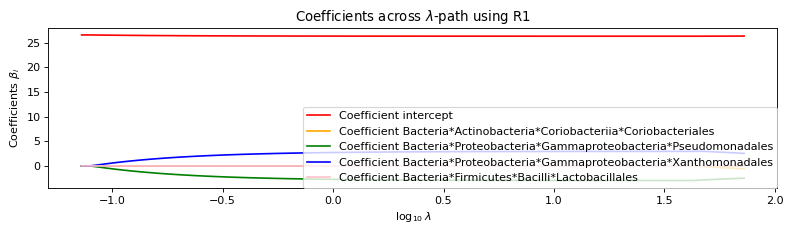

/Users/elisabeth.ailer/anaconda3/envs/comp_iv/lib/python3.9/site-packages/classo/solver.py:1430: UserWarning:

Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.



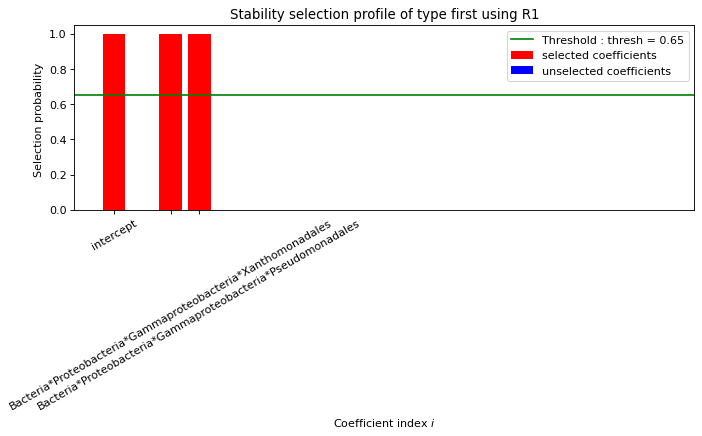

/Users/elisabeth.ailer/anaconda3/envs/comp_iv/lib/python3.9/site-packages/classo/solver.py:1474: UserWarning:

Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.



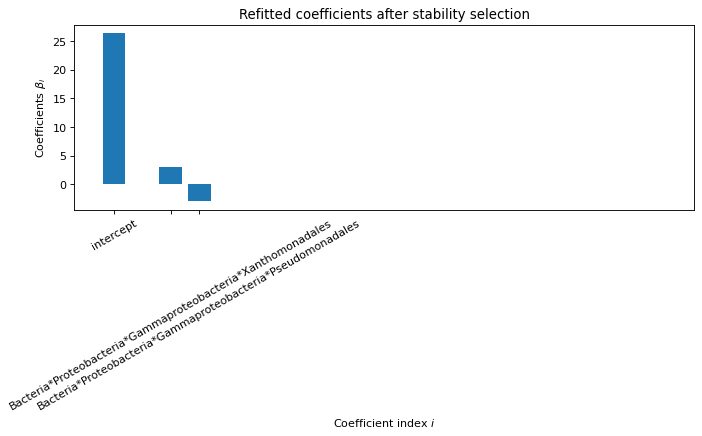


 PATH COMPUTATION : 
   There is also an intercept.  
   Running time :  0.001s

 STABILITY SELECTION : 
   Selected variables :  intercept    Bacteria*Proteobacteria*Gammaproteobacteria*Xanthomonadales    Bacteria*Proteobacteria*Gammaproteobacteria*Pseudomonadales    
   Running time :  0.041s



In [98]:
print("************************************************************************************************")
print("********************************* ONE STAGE METHOD *****************************************")
print("************************************************************************************************")


Yhat, beta = fit_predict_logcontrast(X, Y, threshold=threshold, verbose=verbose, label=bac_names)

intercept_lc = beta[0]
beta_lc = beta[1:]

res = {
    "Only Second LC": {"beta": beta}
}

print("************************************************************************************************")
print("********************************* TWO STAGE METHOD *****************************************")
print("************************************** ILR + LC ****************************************************")
Xhat_ilr, param = regression(Z, X_ilr)
Yhat_ilr, param = fit_predict_logcontrast(cmp.ilr_inv(Xhat_ilr), Y, 
                                          threshold=threshold, verbose=verbose, label=bac_names)

intercept_ilrLC = param[0]
beta_ilrLC = param[1:]

res.update({"ILR+LC": {"beta": np.hstack([intercept_ilrLC, beta_ilrLC])}})

print("************************************************************************************************")
print("********************************* TWO STAGE METHOD *****************************************")
print("************************************** DIR + LC ****************************************************")
from utils_real import r_fit_predict_dirichlet
from rpy2.robjects.packages import importr
from rpy2.robjects import FloatVector, IntVector
from rpy2.robjects import r
from method_fct import r_dirichlet_logcontrast
import rpy2

importr("DirichletReg")

Xhat_dir_r = r_fit_predict_dirichlet(Z, X)

Yhat_dirLC_r, beta = fit_predict_logcontrast(Xhat_dir_r, 
                                           Y, 
                                           threshold=threshold, verbose=verbose, label=bac_names)

intercept_dirLC_r = beta[0]
beta_dirLC_r = beta[1:]

res.update({"DIR+LC": {"beta": beta}})


In [61]:
df = pd.DataFrame(zip(beta_lc, beta_ilrLC, beta_dirLC_r), columns=["Only LC", "ILR+LC", "DIR+LC"])
df.index = bac_names

In [62]:
df

,Only LC,ILR+LC,DIR+LC
Bacteria*Actinobacteria*Coriobacteriia*Coriobacteriales,0.000000,0.000000,0.000000
Bacteria*Proteobacteria*Gammaproteobacteria*Xanthomonadales,0.000000,0.000000,2.959852
Bacteria*Proteobacteria*Gammaproteobacteria*Pseudomonadales,0.000000,0.000000,-2.959852
Bacteria*Proteobacteria*Gammaproteobacteria*Enterobacteriales,0.533164,0.000000,0.000000
Bacteria*Proteobacteria*Betaproteobacteria*Burkholderiales,0.000000,0.000000,0.000000
Bacteria*Proteobacteria*Alphaproteobacteria*Rhizobiales,0.000000,0.000000,0.000000
Bacteria*Proteobacteria*Alphaproteobacteria*Sphingomonadales,0.000000,0.000000,0.000000
Bacteria*Actinobacteria*Actinobacteria*Actinomycetales,0.000000,0.000000,0.000000
Bacteria*Cyanobacteria*Chloroplast*Streptophyta,0.000000,0.000000,0.000000
Bacteria*Cyanobacteria*4C0d-2*YS2,0.000000,0.000000,0.000000


## Binary Outcome

************************************************************************************************
********************************* ONE STAGE METHOD *****************************************
************************************************************************************************


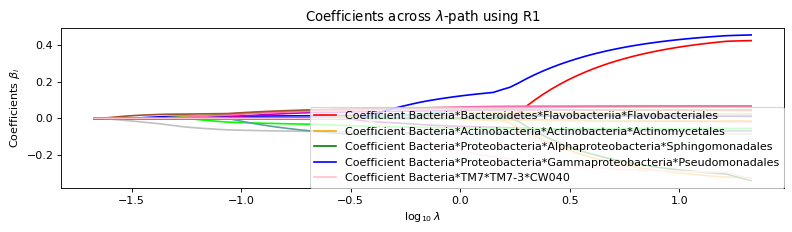

/Users/elisabeth.ailer/anaconda3/envs/comp_iv/lib/python3.9/site-packages/classo/solver.py:1430: UserWarning:

Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.



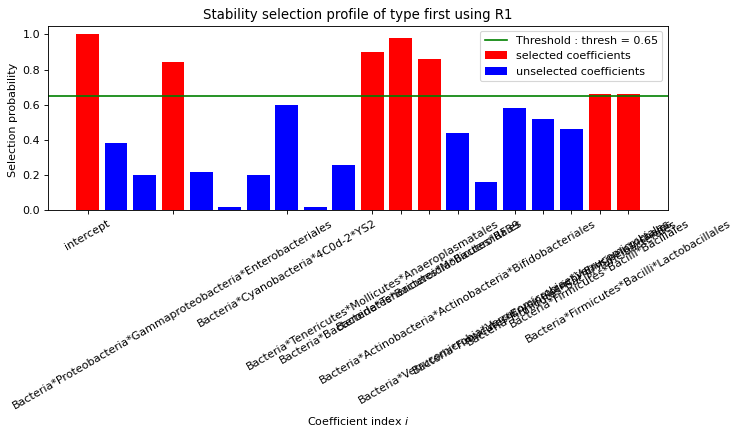

/Users/elisabeth.ailer/anaconda3/envs/comp_iv/lib/python3.9/site-packages/classo/solver.py:1474: UserWarning:

Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.



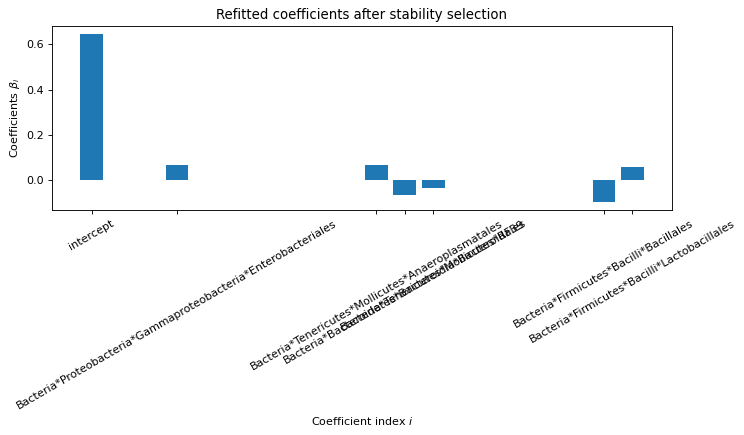


 PATH COMPUTATION : 
   There is also an intercept.  
   Running time :  0.006s

 STABILITY SELECTION : 
   Selected variables :  intercept    Bacteria*Proteobacteria*Gammaproteobacteria*Enterobacteriales    Bacteria*Tenericutes*Mollicutes*Anaeroplasmatales    Bacteria*Bacteroidetes*Bacteroidia*Bacteroidales    Bacteria*Tenericutes*Mollicutes*RF39    Bacteria*Firmicutes*Bacilli*Bacillales    Bacteria*Firmicutes*Bacilli*Lactobacillales    
   Running time :  0.077s

************************************************************************************************
********************************* TWO STAGE METHOD *****************************************
************************************** ILR + LC ****************************************************


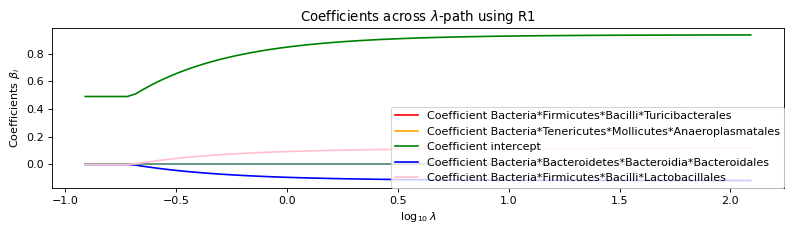

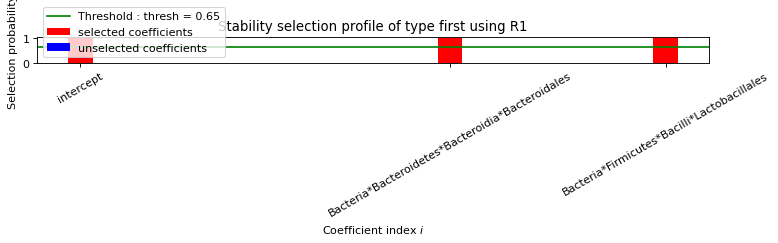

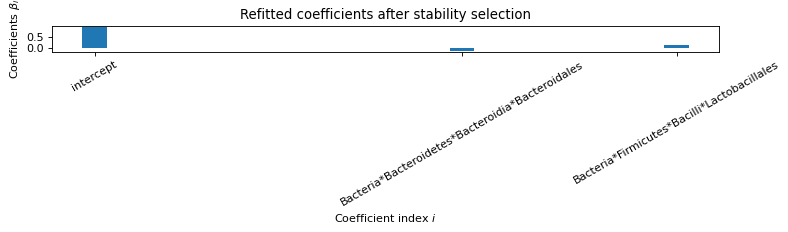


 PATH COMPUTATION : 
   There is also an intercept.  
   Running time :  0.001s

 STABILITY SELECTION : 
   Selected variables :  intercept    Bacteria*Bacteroidetes*Bacteroidia*Bacteroidales    Bacteria*Firmicutes*Bacilli*Lactobacillales    
   Running time :  0.048s

************************************************************************************************
********************************* TWO STAGE METHOD *****************************************
************************************** DIR + LC ****************************************************


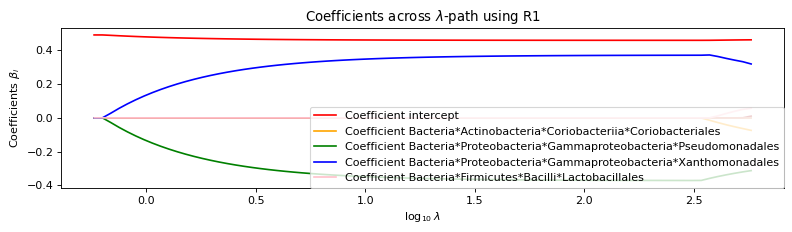

/Users/elisabeth.ailer/anaconda3/envs/comp_iv/lib/python3.9/site-packages/classo/solver.py:1430: UserWarning:

Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.



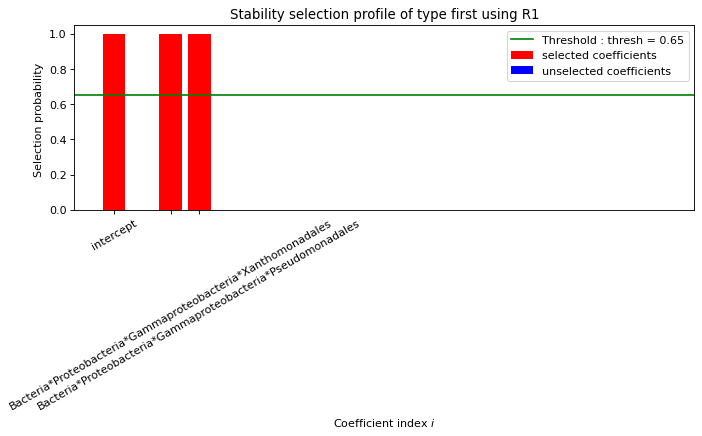

/Users/elisabeth.ailer/anaconda3/envs/comp_iv/lib/python3.9/site-packages/classo/solver.py:1474: UserWarning:

Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.



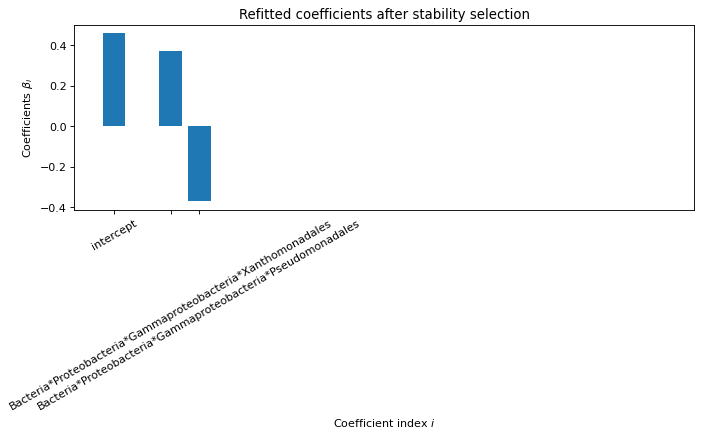


 PATH COMPUTATION : 
   There is also an intercept.  
   Running time :  0.001s

 STABILITY SELECTION : 
   Selected variables :  intercept    Bacteria*Proteobacteria*Gammaproteobacteria*Xanthomonadales    Bacteria*Proteobacteria*Gammaproteobacteria*Pseudomonadales    
   Running time :  0.04s



In [99]:
print("************************************************************************************************")
print("********************************* ONE STAGE METHOD *****************************************")
print("************************************************************************************************")


Yhat, beta = fit_predict_logcontrast(X, Y_binary, threshold=threshold, verbose=verbose, label=bac_names)

intercept_lc = beta[0]
beta_lc = beta[1:]

res = {
    "Only Second LC": {"beta": beta}
}

print("************************************************************************************************")
print("********************************* TWO STAGE METHOD *****************************************")
print("************************************** ILR + LC ****************************************************")
Xhat_ilr, param = regression(Z, X_ilr)
Yhat_ilr, param = fit_predict_logcontrast(cmp.ilr_inv(Xhat_ilr), Y_binary, 
                                          threshold=threshold, verbose=verbose, label=bac_names)

intercept_ilrLC = param[0]
beta_ilrLC = param[1:]

res.update({"ILR+LC": {"beta": np.hstack([intercept_ilrLC, beta_ilrLC])}})

print("************************************************************************************************")
print("********************************* TWO STAGE METHOD *****************************************")
print("************************************** DIR + LC ****************************************************")
from utils_real import r_fit_predict_dirichlet
from rpy2.robjects.packages import importr
from rpy2.robjects import FloatVector, IntVector
from rpy2.robjects import r
from method_fct import r_dirichlet_logcontrast
import rpy2

importr("DirichletReg")

Xhat_dir_r = r_fit_predict_dirichlet(Z, X)

Yhat_dirLC_r, beta = fit_predict_logcontrast(Xhat_dir_r, 
                                           Y_binary, 
                                           threshold=threshold, verbose=verbose, label=bac_names)

intercept_dirLC_r = beta[0]
beta_dirLC_r = beta[1:]

res.update({"DIR+LC": {"beta": beta}})


In [100]:
df = pd.DataFrame(zip(beta_lc, beta_ilrLC, beta_dirLC_r), columns=["Only LC", "ILR+LC", "DIR+LC"])
df.index = bac_names

In [101]:
df

,Only LC,ILR+LC,DIR+LC
Bacteria*Actinobacteria*Coriobacteriia*Coriobacteriales,0.000000,0.000000,0.000000
Bacteria*Proteobacteria*Gammaproteobacteria*Xanthomonadales,0.000000,0.000000,0.371987
Bacteria*Proteobacteria*Gammaproteobacteria*Pseudomonadales,0.000000,0.000000,-0.371987
Bacteria*Proteobacteria*Gammaproteobacteria*Enterobacteriales,0.066970,0.000000,0.000000
Bacteria*Proteobacteria*Betaproteobacteria*Burkholderiales,0.000000,0.000000,0.000000
Bacteria*Proteobacteria*Alphaproteobacteria*Rhizobiales,0.000000,0.000000,0.000000
Bacteria*Proteobacteria*Alphaproteobacteria*Sphingomonadales,0.000000,0.000000,0.000000
Bacteria*Actinobacteria*Actinobacteria*Actinomycetales,0.000000,0.000000,0.000000
Bacteria*Cyanobacteria*Chloroplast*Streptophyta,0.000000,0.000000,0.000000
Bacteria*Cyanobacteria*4C0d-2*YS2,0.000000,0.000000,0.000000
